In [1]:
###-- import dash libraries here
from os import environ
####--import libraries for modtran stuff
import numpy as np
#import scipy as sp
import math

#import numpy as np
import json
from pathlib import Path
import pandas as pd
pi = np.pi
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
def planck(wav, T):
    a = 2.0*h*pi*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5)*(math.e**b - 1.0) )
    return intensity

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
with open('toc_files.json','r') as infile:
    co2_dict = json.load(infile)

In [32]:
altitude='20'
co2='10'
the_dir = co2_dict[altitude][co2]
dir_name = Path(the_dir)
pqfile = dir_name / 'o3_prof.pq'
df = pd.read_parquet(pqfile)
wavelength_um = df[df.keys()[1]]
tot_transm = df[df.keys()[-1]]
total_rad = df[df.keys()[-3]]
scaled_intensity = (tot_transm*planck(df[df.keys()[1]]*1e-6,299.7))/1e6

In [33]:
df

,i,z,p,t,n2,cntmslf,mol_scat,n-1,o3,o2
0,1.0,0.0,1013.000,299.7,7.622000e-01,0.0,9.112000e-01,2.621000e-04,0.0,33420.000000
1,2.0,1.0,904.000,293.7,6.321000e-01,0.0,8.298000e-01,2.386000e-04,0.0,29270.000000
2,3.0,2.0,805.000,287.7,5.223000e-01,0.0,7.543000e-01,2.169000e-04,0.0,25620.000000
3,4.0,3.0,715.000,283.7,4.238000e-01,0.0,6.794000e-01,1.954000e-04,0.0,22190.000000
4,5.0,4.0,633.000,277.0,3.484000e-01,0.0,6.160000e-01,1.772000e-04,0.0,19450.000000
5,6.0,5.0,559.000,270.3,2.853000e-01,0.0,5.575000e-01,1.603000e-04,0.0,17030.000000
6,7.0,6.0,492.000,263.6,2.324000e-01,0.0,5.032000e-01,1.447000e-04,0.0,14900.000000
7,8.0,7.0,432.000,257.0,1.885000e-01,0.0,4.531000e-01,1.303000e-04,0.0,13020.000000
8,9.0,8.0,378.000,250.3,1.522000e-01,0.0,4.071000e-01,1.171000e-04,0.0,11380.000000
9,10.0,9.0,329.000,243.6,1.217000e-01,0.0,3.641000e-01,1.047000e-04,0.0,9902.000000


In [24]:
df[df.keys()[1]]*1e-

0       0.005000
1       0.002500
2       0.001667
3       0.001250
4       0.001000
          ...   
1095    0.000005
1096    0.000005
1097    0.000005
1098    0.000005
1099    0.000005
Name: wavlen_um, Length: 1100, dtype: float64

(5.0, 30.0)

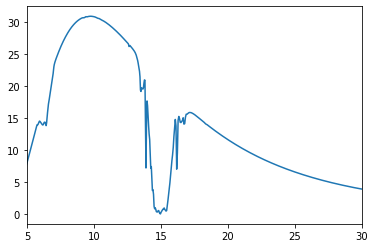

In [19]:
import matplotlib.pyplot as plt
plt.plot(wavelength_um, scaled_intensity)
plt.xlim([5,30])

(5.0, 30.0)

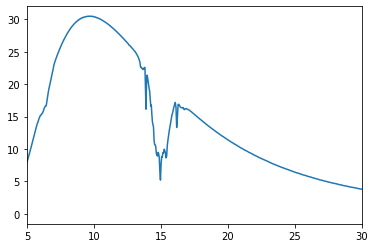

In [20]:
plt.plot(wavelength_um,total_rad*np.pi*1e4)
plt.xlim([5, 30])

In [21]:
atmosphere_contrib = total_rad*np.pi*1e4 - scaled_intensity

In [12]:
type(atmosphere_contrib)

pandas.core.series.Series

In [25]:
zer_array = np.zeros(wavelength_um.size)

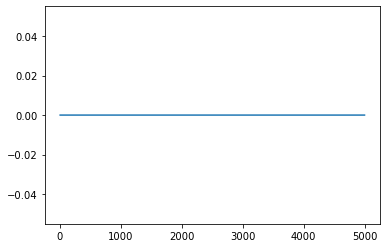

In [28]:
plt.plot(wavelength_um,zer_array)

(5.0, 30.0)

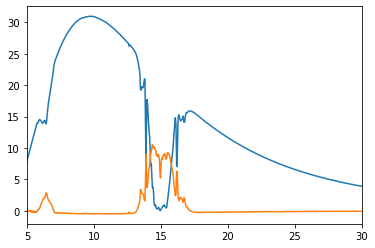

In [22]:
plt.plot(wavelength_um,scaled_intensity)
plt.plot(wavelength_um,atmosphere_contrib)
plt.xlim([5, 30])

In [8]:
 keep_profs = dict()
profs=['mol_prof.pq','aero_prof.pq','o3_prof.pq']
for a_prof in profs:
    the_file = Path(the_dir) / a_prof
    key=the_file.stem
    keep_profs[key] = pd.read_parquet(the_file,engine='fastparquet')
x2_values = keep_profs['o3_prof'][xaxis_data]
y2_values = keep_profs['o3_prof']['z']

NameError: name 'xaxis_data' is not defined

In [10]:
keep_profs['mol_prof']

,i,z,p,t,h2o,o3,co2,co,ch4,n2o,o2,nh3,no,no2,so2
0,1.0,0.0,1013.000,299.7,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
1,2.0,1.0,904.000,293.7,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
2,3.0,2.0,805.000,287.7,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
3,4.0,3.0,715.000,283.7,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
4,5.0,4.0,633.000,277.0,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
5,6.0,5.0,559.000,270.3,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
6,7.0,6.0,492.000,263.6,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
7,8.0,7.0,432.000,257.0,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
8,9.0,8.0,378.000,250.3,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
9,10.0,9.0,329.000,243.6,0.0,0.0,1000.0,0.0,0.0,0.0,209000.0,0.0,0.0,0.0,0.0
